In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data
incident_df = pd.read_csv('NY-2022/NIBRS_incident.csv')
offense_df = pd.read_csv('NY-2022/NIBRS_offense.csv')
offender_df = pd.read_csv('NY-2022/NIBRS_OFFENDER.csv')
victim_df = pd.read_csv('NY-2022/NIBRS_VICTIM.csv')
arrestee_df = pd.read_csv('NY-2022/NIBRS_ARRESTEE.csv')

# labels
location_data = pd.read_csv('NY-2022/NIBRS_LOCATION_TYPE.csv')
offense_type = pd.read_csv('NY-2022/NIBRS_OFFENSE_TYPE.csv')



In [4]:
# dictionary of actual information (does not include label csvs)
df_dict = {"incident": incident_df, "offense": offense_df, "offender": offender_df,"victim": victim_df,"arrestee": arrestee_df}


In [5]:
incident_df.head()

,data_year,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,orig_format,did
0,2022,12939,160978528,44221195,f,2022-11-03 00:09:48.449,2022-01-01,f,2.0,6,NaN,ACCEPTED,NaN,X,160607760
1,2022,12939,160983699,44221195,f,2022-11-03 04:46:48.865,2022-01-01,f,5.0,6,NaN,WARNINGS,NaN,X,160624652
2,2022,12939,160978687,44221195,f,2022-11-03 00:20:11.585,2022-01-01,f,12.0,6,NaN,ACCEPTED,NaN,X,160608288
3,2022,12939,160978693,44221195,f,2022-11-03 00:20:31.242,2022-01-01,f,15.0,6,NaN,WARNINGS,NaN,X,160608306
4,2022,12939,160983700,44221195,f,2022-11-03 04:46:52.954,2022-01-01,f,15.0,6,NaN,ACCEPTED,NaN,X,160624655


In [6]:
for key in df_dict.keys():
    print(f"{key}:{df_dict[key].shape}")


incident:(145000, 15)
offense:(174259, 8)
offender:(161034, 11)
victim:(157470, 16)
arrestee:(38298, 18)


In [7]:
offense_df.head()

,data_year,offense_id,incident_id,offense_code,attempt_complete_flag,location_id,num_premises_entered,method_entry_code
0,2022,192428561,160978528,23H,C,25,NaN,NaN
1,2022,192434817,160983699,23H,C,25,NaN,NaN
2,2022,192428766,160978687,13B,C,35,NaN,NaN
3,2022,192428775,160978693,23H,C,14,NaN,NaN
4,2022,192434818,160983700,520,C,25,NaN,NaN


In [8]:
incident_df.columns

Index(['data_year', 'agency_id', 'incident_id', 'nibrs_month_id',
       'cargo_theft_flag', 'submission_date', 'incident_date',
       'report_date_flag', 'incident_hour', 'cleared_except_id',
       'cleared_except_date', 'incident_status', 'data_home', 'orig_format',
       'did'],
      dtype='object')

In [9]:
incident_df.describe()

,data_year,agency_id,incident_id,nibrs_month_id,incident_hour,cleared_except_id,data_home,did
count,145000.0,145000.000000,1.450000e+05,1.450000e+05,144996.000000,145000.000000,0.0,1.450000e+05
mean,2022.0,13238.564386,1.626082e+08,4.408428e+07,12.966351,5.906931,NaN,1.648001e+08
std,0.0,539.746465,4.124558e+06,6.885278e+05,6.558800,0.581979,NaN,1.065544e+07
min,2022.0,12939.000000,1.503488e+08,4.040047e+07,0.000000,1.000000,NaN,1.328048e+08
25%,2022.0,13088.000000,1.610278e+08,4.418426e+07,9.000000,6.000000,NaN,1.607521e+08
50%,2022.0,13206.000000,1.651652e+08,4.422194e+07,14.000000,6.000000,NaN,1.712285e+08
75%,2022.0,13303.000000,1.653340e+08,4.427394e+07,18.000000,6.000000,NaN,1.717151e+08
max,2022.0,29174.000000,1.693784e+08,4.449321e+07,23.000000,6.000000,NaN,1.827031e+08


In [10]:
offender_df.describe()

,data_year,offender_id,incident_id,offender_seq_num,age_id,race_id,ethnicity_id,age_range_low_num,age_range_high_num
count,161034.0,1.610340e+05,1.610340e+05,161034.000000,161034.000000,161034.000000,161034.000000,107531.000000,0.0
mean,2022.0,1.846678e+08,1.626490e+08,1.730790,61.213973,51.065725,32.344536,37.064251,NaN
std,0.0,4.660427e+06,4.121277e+06,3.498054,32.099015,41.831681,13.735499,14.019128,NaN
min,2022.0,1.707592e+08,1.503488e+08,0.000000,4.000000,10.000000,10.000000,1.000000,NaN
25%,2022.0,1.828395e+08,1.610286e+08,0.000000,34.000000,10.000000,20.000000,26.000000,NaN
50%,2022.0,1.875112e+08,1.651660e+08,1.000000,53.000000,20.000000,40.000000,36.000000,NaN
75%,2022.0,1.877052e+08,1.653377e+08,1.000000,104.000000,99.000000,50.000000,50.000000,NaN
max,2022.0,1.922795e+08,1.693784e+08,131.000000,104.000000,99.000000,50.000000,98.000000,NaN


In [11]:
print(incident_df.columns)
print(offense_df.columns)

Index(['data_year', 'agency_id', 'incident_id', 'nibrs_month_id',
       'cargo_theft_flag', 'submission_date', 'incident_date',
       'report_date_flag', 'incident_hour', 'cleared_except_id',
       'cleared_except_date', 'incident_status', 'data_home', 'orig_format',
       'did'],
      dtype='object')
Index(['data_year', 'offense_id', 'incident_id', 'offense_code',
       'attempt_complete_flag', 'location_id', 'num_premises_entered',
       'method_entry_code'],
      dtype='object')


In [12]:
merged_df = pd.merge(incident_df, offense_df, on='incident_id', how='left')
merged_df

,data_year_x,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,...,data_home,orig_format,did,data_year_y,offense_id,offense_code,attempt_complete_flag,location_id,num_premises_entered,method_entry_code
0,2022,12939,160978528,44221195,f,2022-11-03 00:09:48.449,2022-01-01,f,2.0,6,...,NaN,X,160607760,2022,192428561,23H,C,25,NaN,NaN
1,2022,12939,160983699,44221195,f,2022-11-03 04:46:48.865,2022-01-01,f,5.0,6,...,NaN,X,160624652,2022,192434817,23H,C,25,NaN,NaN
2,2022,12939,160978687,44221195,f,2022-11-03 00:20:11.585,2022-01-01,f,12.0,6,...,NaN,X,160608288,2022,192428766,13B,C,35,NaN,NaN
3,2022,12939,160978693,44221195,f,2022-11-03 00:20:31.242,2022-01-01,f,15.0,6,...,NaN,X,160608306,2022,192428775,23H,C,14,NaN,NaN
4,2022,12939,160983700,44221195,f,2022-11-03 04:46:52.954,2022-01-01,f,15.0,6,...,NaN,X,160624655,2022,192434818,520,C,25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174254,2022,13697,165888416,44298069,f,2023-02-04 16:04:07.91,2022-12-01,f,12.0,2,...,NaN,X,173247118,2022,198051853,290,C,35,NaN,NaN
174255,2022,13697,165888417,44298069,f,2023-02-04 16:04:14.011,2022-12-13,f,23.0,6,...,NaN,X,173247121,2022,198051854,13C,C,39,NaN,NaN
174256,2022,13697,165888419,44298069,f,2023-02-04 16:04:20.389,2022-12-19,f,17.0,6,...,NaN,X,173247127,2022,198051856,23H,C,39,NaN,NaN
174257,2022,13697,169340853,44294279,f,2023-04-05 10:11:09.688,2022-11-15,f,12.0,6,...,NaN,X,182567715,2022,202029186,23D,C,39,NaN,NaN


In [13]:
merged_df.shape

(174259, 22)

In [14]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174259 entries, 0 to 174258
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_year_x            174259 non-null  int64  
 1   agency_id              174259 non-null  int64  
 2   incident_id            174259 non-null  int64  
 3   nibrs_month_id         174259 non-null  int64  
 4   cargo_theft_flag       174259 non-null  object 
 5   submission_date        174259 non-null  object 
 6   incident_date          174259 non-null  object 
 7   report_date_flag       174259 non-null  object 
 8   incident_hour          174255 non-null  float64
 9   cleared_except_id      174259 non-null  int64  
 10  cleared_except_date    4191 non-null    object 
 11  incident_status        174259 non-null  object 
 12  data_home              0 non-null       float64
 13  orig_format            174259 non-null  object 
 14  did                    174259 non-nu

In [15]:
merged_df.describe()

,data_year_x,agency_id,incident_id,nibrs_month_id,incident_hour,cleared_except_id,data_home,did,data_year_y,offense_id,location_id,num_premises_entered
count,174259.0,174259.000000,1.742590e+05,1.742590e+05,174255.000000,174259.000000,0.0,1.742590e+05,174259.0,1.742590e+05,174259.000000,117.000000
mean,2022.0,13234.075221,1.626749e+08,4.408522e+07,12.837244,5.915746,NaN,1.649728e+08,2022.0,1.943692e+08,42.817754,3.188034
std,0.0,533.558943,4.081799e+06,6.877079e+05,6.650198,0.554261,NaN,1.054642e+07,0.0,4.682244e+06,27.528152,12.958775
min,2022.0,12939.000000,1.503488e+08,4.040047e+07,0.000000,1.000000,NaN,1.328048e+08,2022.0,1.802224e+08,1.000000,1.000000
25%,2022.0,13088.000000,1.610307e+08,4.418432e+07,9.000000,6.000000,NaN,1.607702e+08,2022.0,1.924907e+08,25.000000,1.000000
50%,2022.0,13206.000000,1.651658e+08,4.422195e+07,14.000000,6.000000,NaN,1.712306e+08,2022.0,1.972192e+08,35.000000,1.000000
75%,2022.0,13291.000000,1.653378e+08,4.427394e+07,18.000000,6.000000,NaN,1.717276e+08,2022.0,1.974176e+08,37.000000,1.000000
max,2022.0,29174.000000,1.693784e+08,4.449321e+07,23.000000,6.000000,NaN,1.827031e+08,2022.0,2.020735e+08,98.000000,99.000000


In [16]:
missing_values = merged_df.isnull().sum()
missing_values


data_year_x                   0
agency_id                     0
incident_id                   0
nibrs_month_id                0
cargo_theft_flag              0
submission_date               0
incident_date                 0
report_date_flag              0
incident_hour                 4
cleared_except_id             0
cleared_except_date      170068
incident_status               0
data_home                174259
orig_format                   0
did                           0
data_year_y                   0
offense_id                    0
offense_code                  0
attempt_complete_flag         0
location_id                   0
num_premises_entered     174142
method_entry_code        166364
dtype: int64

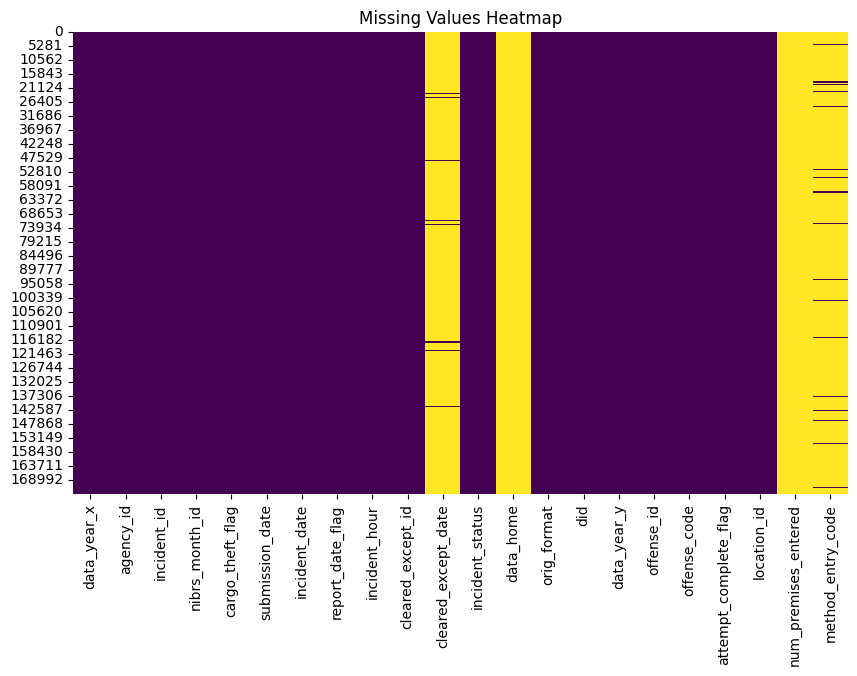

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [18]:
df = merged_df.drop(columns=['cleared_except_date', 'data_home', 'num_premises_entered', 'method_entry_code'])

In [19]:
df.columns

Index(['data_year_x', 'agency_id', 'incident_id', 'nibrs_month_id',
       'cargo_theft_flag', 'submission_date', 'incident_date',
       'report_date_flag', 'incident_hour', 'cleared_except_id',
       'incident_status', 'orig_format', 'did', 'data_year_y', 'offense_id',
       'offense_code', 'attempt_complete_flag', 'location_id'],
      dtype='object')

In [20]:
df.isnull().sum()


data_year_x              0
agency_id                0
incident_id              0
nibrs_month_id           0
cargo_theft_flag         0
submission_date          0
incident_date            0
report_date_flag         0
incident_hour            4
cleared_except_id        0
incident_status          0
orig_format              0
did                      0
data_year_y              0
offense_id               0
offense_code             0
attempt_complete_flag    0
location_id              0
dtype: int64

In [21]:
location_data.head()

,location_id,location_code,location_name
0,1,37,Abandoned/Condemned Structure
1,2,1,Air/Bus/Train Terminal
2,3,38,Amusement Park
3,4,39,Arena/Stadium/Fairgrounds/Coliseum
4,5,40,ATM Separate from Bank


In [22]:
# Merge the plot data with location data based on 'location_id'
merged_data = pd.merge(merged_df, location_data, on='location_id', how='left')
merged_data.head()


,data_year_x,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,...,did,data_year_y,offense_id,offense_code,attempt_complete_flag,location_id,num_premises_entered,method_entry_code,location_code,location_name
0,2022,12939,160978528,44221195,f,2022-11-03 00:09:48.449,2022-01-01,f,2.0,6,...,160607760,2022,192428561,23H,C,25,NaN,NaN,13,Highway/Road/Alley/Street/Sidewalk
1,2022,12939,160983699,44221195,f,2022-11-03 04:46:48.865,2022-01-01,f,5.0,6,...,160624652,2022,192434817,23H,C,25,NaN,NaN,13,Highway/Road/Alley/Street/Sidewalk
2,2022,12939,160978687,44221195,f,2022-11-03 00:20:11.585,2022-01-01,f,12.0,6,...,160608288,2022,192428766,13B,C,35,NaN,NaN,20,Residence/Home
3,2022,12939,160978693,44221195,f,2022-11-03 00:20:31.242,2022-01-01,f,15.0,6,...,160608306,2022,192428775,23H,C,14,NaN,NaN,7,Convenience Store
4,2022,12939,160983700,44221195,f,2022-11-03 04:46:52.954,2022-01-01,f,15.0,6,...,160624655,2022,192434818,520,C,25,NaN,NaN,13,Highway/Road/Alley/Street/Sidewalk


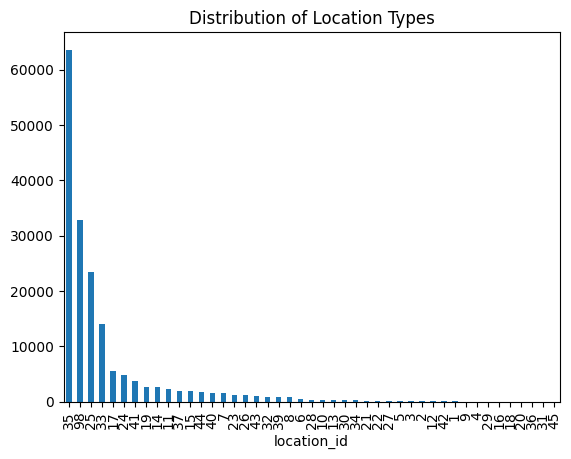

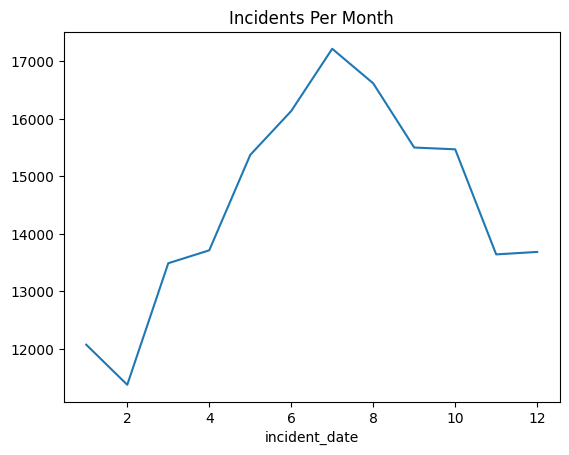

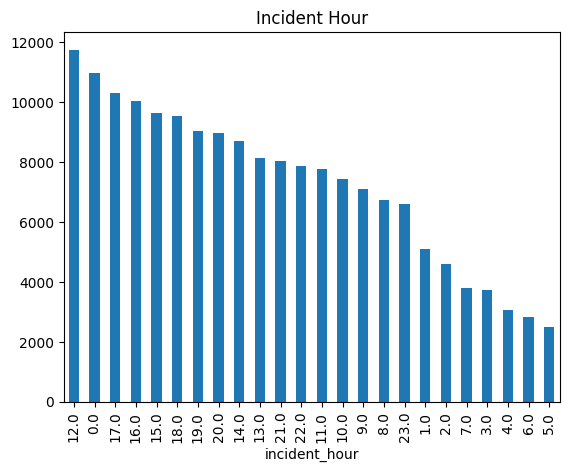

In [23]:
import matplotlib.pyplot as plt

merged_data['location_id'].value_counts().plot(kind='bar')
plt.title('Distribution of Location Types')
plt.show()

df['incident_date'] = pd.to_datetime(df['incident_date'])
df.groupby(df['incident_date'].dt.month).size().plot(kind='line')
plt.title('Incidents Per Month')
plt.show()

merged_data['incident_hour'].value_counts().plot(kind='bar')
plt.title('Incident Hour')
plt.show()

In [24]:
location_data.columns

Index(['location_id', 'location_code', 'location_name'], dtype='object')

In [25]:
merged_data['location_name'].value_counts().head(10)

location_name
Residence/Home                         63557
Other/Unknown                          32743
Highway/Road/Alley/Street/Sidewalk     23502
Parking/Drop Lot/Garage                14024
Department/Discount Store               5655
Grocery/Supermarket                     4779
Service/Gas Station                     3849
Drug Store/Doctor's Office/Hospital     2760
Convenience Store                       2649
Commercial/Office Building              2242
Name: count, dtype: int64

In [26]:
merged_data.shape

(174259, 24)

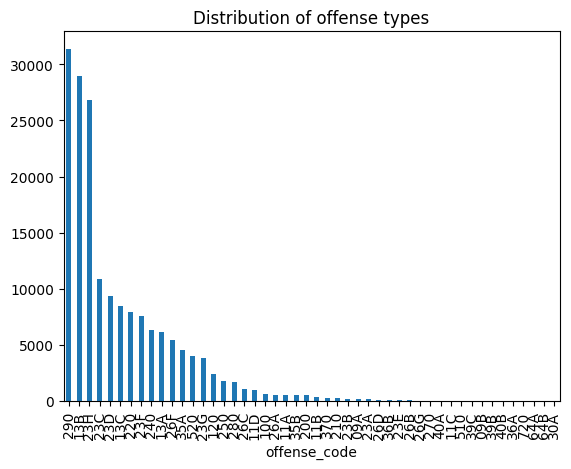

In [27]:
merged_data['offense_code'].value_counts().plot(kind='bar')
plt.title('Distribution of offense types')
plt.show()

In [28]:
offense_type.columns

Index(['offense_code', 'offense_name', 'crime_against', 'ct_flag', 'hc_flag',
       'hc_code', 'offense_category_name', 'offense_group'],
      dtype='object')

In [29]:
merged_data = pd.merge(merged_df, offense_type, on='offense_code', how='left')
merged_data.head()

,data_year_x,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,...,location_id,num_premises_entered,method_entry_code,offense_name,crime_against,ct_flag,hc_flag,hc_code,offense_category_name,offense_group
0,2022,12939,160978528,44221195,f,2022-11-03 00:09:48.449,2022-01-01,f,2.0,6,...,25,NaN,NaN,All Other Larceny,Property,t,f,,Larceny/Theft Offenses,A
1,2022,12939,160983699,44221195,f,2022-11-03 04:46:48.865,2022-01-01,f,5.0,6,...,25,NaN,NaN,All Other Larceny,Property,t,f,,Larceny/Theft Offenses,A
2,2022,12939,160978687,44221195,f,2022-11-03 00:20:11.585,2022-01-01,f,12.0,6,...,35,NaN,NaN,Simple Assault,Person,f,t,09,Assault Offenses,A
3,2022,12939,160978693,44221195,f,2022-11-03 00:20:31.242,2022-01-01,f,15.0,6,...,14,NaN,NaN,All Other Larceny,Property,t,f,,Larceny/Theft Offenses,A
4,2022,12939,160983700,44221195,f,2022-11-03 04:46:52.954,2022-01-01,f,15.0,6,...,25,NaN,NaN,Weapon Law Violations,Society,f,t,,Weapon Law Violations,A


In [30]:
merged_data.columns

Index(['data_year_x', 'agency_id', 'incident_id', 'nibrs_month_id',
       'cargo_theft_flag', 'submission_date', 'incident_date',
       'report_date_flag', 'incident_hour', 'cleared_except_id',
       'cleared_except_date', 'incident_status', 'data_home', 'orig_format',
       'did', 'data_year_y', 'offense_id', 'offense_code',
       'attempt_complete_flag', 'location_id', 'num_premises_entered',
       'method_entry_code', 'offense_name', 'crime_against', 'ct_flag',
       'hc_flag', 'hc_code', 'offense_category_name', 'offense_group'],
      dtype='object')

In [31]:
merged_data['offense_name'].value_counts().head(10)

offense_name
Destruction/Damage/Vandalism of Property    31350
Simple Assault                              28996
All Other Larceny                           26773
Shoplifting                                 10837
Theft From Building                          9324
Intimidation                                 8508
Burglary/Breaking & Entering                 7895
Theft From Motor Vehicle                     7595
Motor Vehicle Theft                          6332
Aggravated Assault                           6186
Name: count, dtype: int64

In [32]:
unique_values = {col: merged_data[col].unique() for col in merged_data.columns}
unique_values


{'data_year_x': array([2022]),
 'agency_id': array([12939, 12946, 12948, 12968, 13045, 13056, 12969, 13057, 13058,
        13067, 12970, 13068, 12971, 13072, 13081, 12976, 13083, 13084,
        12978, 13088, 12979, 12992, 12993, 12999, 13000, 13001, 13002,
        13009, 13012, 13016, 13017, 13033, 13154, 13162, 13163, 13184,
        13190, 13205, 13091, 13206, 13132, 13133, 13136, 13137, 13138,
        13335, 13338, 13344, 13346, 13347, 13349, 13360, 13367, 13374,
        13376, 13384, 13385, 13396, 13419, 13425, 13427, 13428, 13430,
        13431, 13207, 13432, 13434, 13209, 13437, 13210, 13211, 13438,
        13212, 13439, 13213, 13440, 13441, 13443, 13214, 13446, 13460,
        13215, 13216, 13218, 13227, 13229, 13261, 13279, 13464, 13281,
        13465, 13471, 13473, 13475, 13478, 13526, 13538, 13539, 13553,
        13556, 13560, 13561, 13562, 13564, 13565, 13282, 13566, 13567,
        13568, 13569, 13285, 13286, 13573, 13574, 13287, 13289, 13575,
        13581, 13605, 13290, 1360

In [33]:
merged_df.nunique()

data_year_x                   1
agency_id                   149
incident_id              145000
nibrs_month_id             1648
cargo_theft_flag              2
submission_date          145000
incident_date               365
report_date_flag              2
incident_hour                24
cleared_except_id             6
cleared_except_date         366
incident_status               2
data_home                     0
orig_format                   1
did                      145000
data_year_y                   1
offense_id               174259
offense_code                 48
attempt_complete_flag         2
location_id                  45
num_premises_entered          9
method_entry_code             2
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174259 entries, 0 to 174258
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_year_x            174259 non-null  int64         
 1   agency_id              174259 non-null  int64         
 2   incident_id            174259 non-null  int64         
 3   nibrs_month_id         174259 non-null  int64         
 4   cargo_theft_flag       174259 non-null  object        
 5   submission_date        174259 non-null  object        
 6   incident_date          174259 non-null  datetime64[ns]
 7   report_date_flag       174259 non-null  object        
 8   incident_hour          174255 non-null  float64       
 9   cleared_except_id      174259 non-null  int64         
 10  incident_status        174259 non-null  object        
 11  orig_format            174259 non-null  object        
 12  did                    174259 non-null  int6

In [35]:
df_int = df.drop(columns=['cargo_theft_flag','submission_date','report_date_flag','incident_status','orig_format','offense_code','attempt_complete_flag'])

In [36]:
corre_matrix = df_int.corr()

In [37]:
corre_matrix

,data_year_x,agency_id,incident_id,nibrs_month_id,incident_date,incident_hour,cleared_except_id,did,data_year_y,offense_id,location_id
data_year_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agency_id,NaN,1.000000,0.000412,0.034552,-0.005005,0.004231,-0.006542,0.000618,NaN,0.000385,0.045727
incident_id,NaN,0.000412,1.000000,0.254024,0.503587,-0.003966,-0.035657,0.999921,NaN,0.999999,-0.021200
nibrs_month_id,NaN,0.034552,0.254024,1.000000,0.405239,0.008720,0.000179,0.256997,NaN,0.254320,0.003228
incident_date,NaN,-0.005005,0.503587,0.405239,1.000000,0.010115,0.003247,0.505478,NaN,0.503865,-0.012278
incident_hour,NaN,0.004231,-0.003966,0.008720,0.010115,1.000000,-0.016719,-0.004119,NaN,-0.003989,0.003343
cleared_except_id,NaN,-0.006542,-0.035657,0.000179,0.003247,-0.016719,1.000000,-0.035109,NaN,-0.035626,-0.003793
did,NaN,0.000618,0.999921,0.256997,0.505478,-0.004119,-0.035109,1.000000,NaN,0.999932,-0.021117
data_year_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offense_id,NaN,0.000385,0.999999,0.254320,0.503865,-0.003989,-0.035626,0.999932,NaN,1.000000,-0.021252


In [39]:
merged_arrestee = pd.merge(merged_data, arrestee_df, on='incident_id', how='left')
merged_arrestee

,data_year_x,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,...,age_id,age_num,sex_code,race_id,ethnicity_id,resident_code,under_18_disposition_code,clearance_ind,age_range_low_num,age_range_high_num
0,2022,12939,160978528,44221195,f,2022-11-03 00:09:48.449,2022-01-01,f,2.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,12939,160983699,44221195,f,2022-11-03 04:46:48.865,2022-01-01,f,5.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,12939,160978687,44221195,f,2022-11-03 00:20:11.585,2022-01-01,f,12.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,12939,160978693,44221195,f,2022-11-03 00:20:31.242,2022-01-01,f,15.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,12939,160983700,44221195,f,2022-11-03 04:46:52.954,2022-01-01,f,15.0,6,...,34.0,31.0,M,10.0,20.0,U,NaN,NaN,31.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180111,2022,13697,165888416,44298069,f,2023-02-04 16:04:07.91,2022-12-01,f,12.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180112,2022,13697,165888417,44298069,f,2023-02-04 16:04:14.011,2022-12-13,f,23.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180113,2022,13697,165888419,44298069,f,2023-02-04 16:04:20.389,2022-12-19,f,17.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180114,2022,13697,169340853,44294279,f,2023-04-05 10:11:09.688,2022-11-15,f,12.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
victim_df.columns

Index(['data_year', 'victim_id', 'incident_id', 'victim_seq_num',
       'victim_type_id', 'assignment_type_id', 'activity_type_id',
       'outside_agency_id', 'age_id', 'age_num', 'sex_code', 'race_id',
       'ethnicity_id', 'resident_status_code', 'age_range_low_num',
       'age_code_range_high'],
      dtype='object')

In [44]:
merged_arrestee.drop(columns=['data_year_x'],inplace=True)

In [46]:
offender_df.columns

Index(['data_year', 'offender_id', 'incident_id', 'offender_seq_num', 'age_id',
       'age_num', 'sex_code', 'race_id', 'ethnicity_id', 'age_range_low_num',
       'age_range_high_num'],
      dtype='object')

In [45]:
merged_victim = pd.merge(merged_arrestee, victim_df, on='incident_id', how='left')

In [47]:
merged_all = pd.merge(merged_victim, offender_df, on='incident_id', how='left')

In [48]:
merged_all

,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,...,data_year,offender_id,offender_seq_num,age_id,age_num,sex_code,race_id,ethnicity_id,age_range_low_num,age_range_high_num_y
0,12939,160978528,44221195,f,2022-11-03 00:09:48.449,2022-01-01,f,2.0,6,NaN,...,2022,182783770,1,103,00,M,20,40,NaN,NaN
1,12939,160983699,44221195,f,2022-11-03 04:46:48.865,2022-01-01,f,5.0,6,NaN,...,2022,182789759,1,103,00,M,20,40,NaN,NaN
2,12939,160978687,44221195,f,2022-11-03 00:20:11.585,2022-01-01,f,12.0,6,NaN,...,2022,182783955,1,29,26,M,20,20,26.0,NaN
3,12939,160978693,44221195,f,2022-11-03 00:20:31.242,2022-01-01,f,15.0,6,NaN,...,2022,182783963,1,103,00,M,20,40,NaN,NaN
4,12939,160983700,44221195,f,2022-11-03 04:46:52.954,2022-01-01,f,15.0,6,NaN,...,2022,182789760,1,103,00,M,10,40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250970,13697,165888416,44298069,f,2023-02-04 16:04:07.91,2022-12-01,f,12.0,2,2022-12-01,...,2022,188331509,1,26,23,M,20,40,23.0,NaN
250971,13697,165888417,44298069,f,2023-02-04 16:04:14.011,2022-12-13,f,23.0,6,NaN,...,2022,188331510,1,53,50,U,98,40,50.0,NaN
250972,13697,165888419,44298069,f,2023-02-04 16:04:20.389,2022-12-19,f,17.0,6,NaN,...,2022,188331512,1,46,43,U,98,40,43.0,NaN
250973,13697,169340853,44294279,f,2023-04-05 10:11:09.688,2022-11-15,f,12.0,6,NaN,...,2022,192236814,1,53,50,U,98,40,50.0,NaN


In [52]:
merged_all.dtypes

agency_id                 int64
incident_id               int64
nibrs_month_id            int64
cargo_theft_flag         object
submission_date          object
                         ...   
sex_code                 object
race_id                   int64
ethnicity_id              int64
age_range_low_num       float64
age_range_high_num_y    float64
Length: 70, dtype: object